In [2]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.naive_bayes import GaussianNB


In [3]:
data = pd.read_csv('titanic.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
print("\nMissing Values:")
print(data.isnull().sum())


Missing Values:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [5]:
data['Age'].fillna(data['Age'].median(), inplace=True)
data['Embarked'].fillna(data['Embarked'].mode()[0], inplace=True)

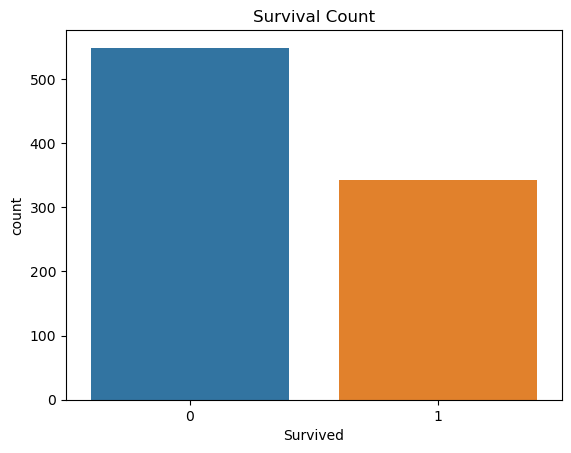

In [6]:
sns.countplot(x='Survived', data=data)
plt.title('Survival Count')
plt.show()

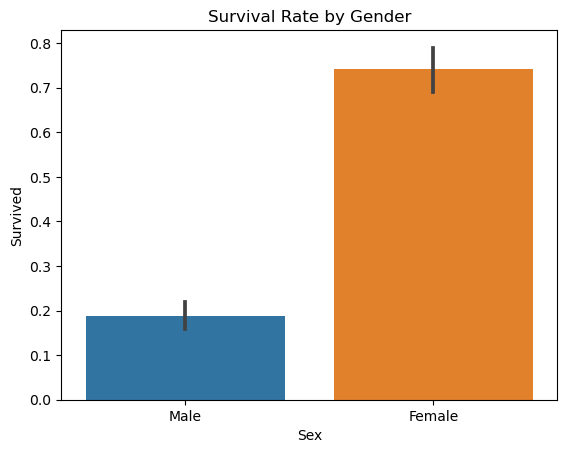

In [7]:
sns.barplot(x='Sex', y='Survived', data=data)
plt.title('Survival Rate by Gender')
plt.xticks(ticks=[0, 1], labels=['Male', 'Female'])
plt.show()

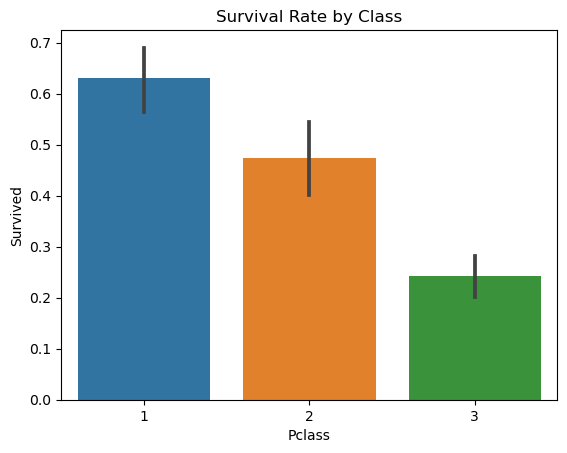

In [8]:
sns.barplot(x='Pclass', y='Survived', data=data)
plt.title('Survival Rate by Class')
plt.show()

In [9]:
data['Sex'] = data['Sex'].map({'male': 0, 'female': 1})
data = pd.get_dummies(data, columns=['Embarked'], drop_first=True)
X = data[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked_Q', 'Embarked_S']]
y = data['Survived']

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
model = GaussianNB()
model.fit(X_train, y_train)

GaussianNB()

In [12]:
y_pred = model.predict(X_test)


In [13]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print(f'\nModel Evaluation:')
print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')


Model Evaluation:
Accuracy: 0.77
Precision: 0.72
Recall: 0.73
F1 Score: 0.72


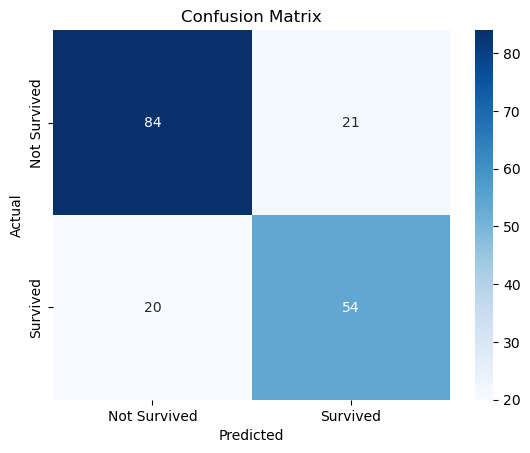

In [14]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Survived', 'Survived'], yticklabels=['Not Survived', 'Survived'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

In [16]:
def classify_unknown():
    print("\nEnter passenger details to classify:")
    pclass = int(input("Pclass (1, 2, or 3): "))
    sex = input("Sex (male/female): ").strip().lower()
    sex = 0 if sex == 'male' else 1
    age = float(input("Age: "))
    sibsp = int(input("Number of siblings/spouses aboard: "))
    parch = int(input("Number of parents/children aboard: "))
    fare = float(input("Fare: "))
    embarked = input("Embarked (C, Q, S): ").strip().upper()
    embarked_q = 1 if embarked == 'Q' else 0
    embarked_s = 1 if embarked == 'S' else 0
    unknown_passenger = pd.DataFrame([[pclass, sex, age, sibsp, parch, fare, embarked_q, embarked_s]],
                                      columns=['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked_Q', 'Embarked_S'])
    prediction = model.predict(unknown_passenger)
    print(f"Predicted Survival: {'Survived' if prediction[0] == 1 else 'Not Survived'}")
classify_unknown()



Enter passenger details to classify:
Pclass (1, 2, or 3): 1
Sex (male/female): 1
Age: 21
Number of siblings/spouses aboard: 1
Number of parents/children aboard: 0
Fare: 120
Embarked (C, Q, S): C
Predicted Survival: Survived


In [17]:
gnb=GaussianNB()

In [18]:
param_grid={
    'var_smoothing':[1e-9,1e-8,1e-7,1e-6,1e-5]
}

In [19]:
grid_search=GridSearchCV(
    estimator=gnb,
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
  )

In [20]:
grid_search.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=GaussianNB(), n_jobs=-1,
             param_grid={'var_smoothing': [1e-09, 1e-08, 1e-07, 1e-06, 1e-05]},
             scoring='accuracy')

In [25]:
best_params=grid_search.best_params_
best_score=grid_search.best_score_
print(f"Best Parameter:{best_params}")
print(f"Best Cross-Validation Accuracy:{best_score:.4f}")

Best Parameter:{'var_smoothing': 1e-09}
Best Cross-Validation Accuracy:0.7822



Model Performance after Hyperparameter Tuning:
Accuracy: 0.77
Precision: 0.72
Recall: 0.73
F1 Score: 0.72


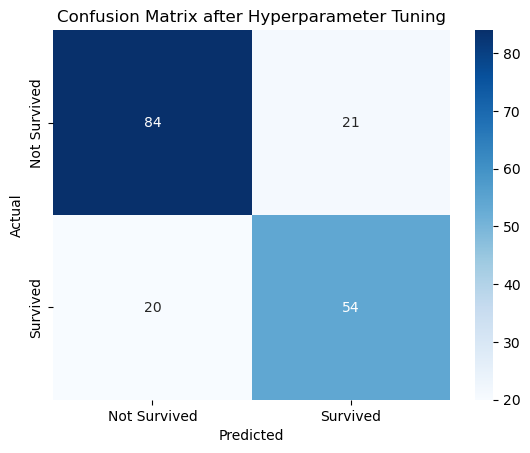

In [26]:
best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test)
accuracy_best = accuracy_score(y_test, y_pred_best)
precision_best = precision_score(y_test, y_pred_best)
recall_best = recall_score(y_test, y_pred_best)
f1_best = f1_score(y_test, y_pred_best)

print(f"\nModel Performance after Hyperparameter Tuning:")
print(f"Accuracy: {accuracy_best:.2f}")
print(f"Precision: {precision_best:.2f}")
print(f"Recall: {recall_best:.2f}")
print(f"F1 Score: {f1_best:.2f}")

# Confusion matrix for the tuned model

cm_best = confusion_matrix(y_test, y_pred_best)
sns.heatmap(cm_best, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Survived', 'Survived'], yticklabels=['Not Survived', 'Survived'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix after Hyperparameter Tuning')
plt.show()


## Conclusion:
### The accuracy of the Naive Bayes model remained the same before and after hyperparameter tuning because the model had likely reached its optimal performance with default parameters. Naive Bayes assumes that features are independent, which can limit its ability to improve accuracy through tuning. Since the Titanic dataset contains correlated features (like gender and class), this assumption restricts the model's flexibility. More complex models would likely perform better in capturing such relationships.